In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data

data = load_breast_cancer(return_X_y=False, as_frame=True)
dt = data.frame

In [ ]:
dt

In [ ]:
data.feature_names

In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
X, y = load_breast_cancer(return_X_y=True, as_frame=False)

In [6]:
# split into traing and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [7]:
# scale the datasets
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [8]:
# train model
tree = DecisionTreeClassifier()
tree.fit(X_train_scale, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
# Making prediction
y_pred = tree.predict(X_test_scale)

In [ ]:
y_pred

In [10]:
# Calculating accuracy
acc = accuracy_score(y_test, y_pred)
acc

0.9385964912280702

In [11]:
# calculating Classification Report
cr = classification_report(y_test, y_pred)
print(f"The Classification Report is: \n{cr}")

The Classification Report is: 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [12]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"The Confusion Matrix is:\n{cm}")

The Confusion Matrix is:
[[38  4]
 [ 3 69]]


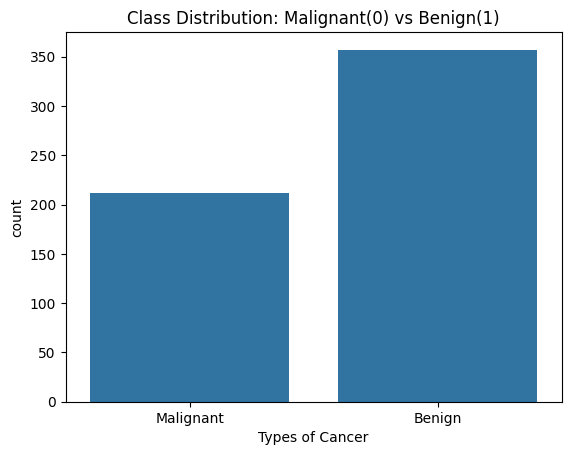

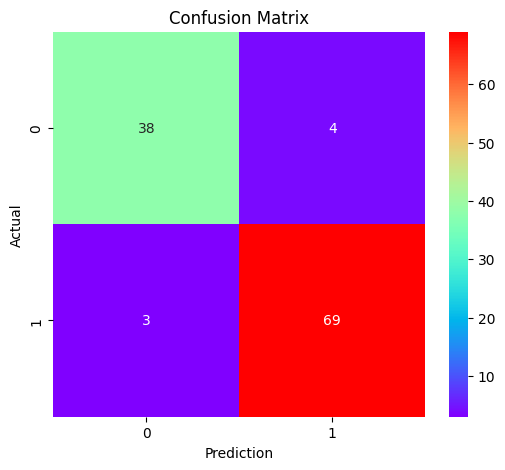

In [21]:
# visualization
# 1. Class Visualization
sns.countplot(x=y)
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.title("Class Distribution: Malignant(0) vs Benign(1)")
plt.xlabel("Types of Cancer")
plt.show()
# 2. Confusion MAtrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()